DATA COLLECTION

In [24]:
#data collection
import nltk 

nltk.download('gutenberg')
import pandas as pd




[nltk_data] Downloading package gutenberg to C:\Users\Nikhil
[nltk_data]     Warge\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [25]:
from nltk.corpus import gutenberg

# Load the raw text of 'Hamlet' by Shakespeare
data = gutenberg.raw('shakespeare-hamlet.txt')

#save the data

with open('data.txt','w') as file:
    file.write(data)



In [26]:
#DATA PREPROCESSING 
import numpy as np #for the numerical operations
from tensorflow.keras.preprocessing.text import Tokenizer #convert the sentences into tokens
from tensorflow.keras.preprocessing.sequence import  pad_sequences # give input to the model in fixed number of words
from sklearn.model_selection import train_test_split #convert the data into training and testing data

#load the data
with open('data.txt','r') as file:
    text=file.read().lower() #lowrig all the text

#Tokenize the Txt- creating the indexes for the words

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

total_words= len(tokenizer.word_index)+1

total_words

4818

In [27]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'i': 5,
 'you': 6,
 'a': 7,
 'my': 8,
 'it': 9,
 'in': 10,
 'that': 11,
 'ham': 12,
 'is': 13,
 'not': 14,
 'his': 15,
 'this': 16,
 'with': 17,
 'your': 18,
 'but': 19,
 'for': 20,
 'me': 21,
 'lord': 22,
 'as': 23,
 'what': 24,
 'he': 25,
 'be': 26,
 'so': 27,
 'him': 28,
 'haue': 29,
 'king': 30,
 'will': 31,
 'no': 32,
 'our': 33,
 'we': 34,
 'on': 35,
 'are': 36,
 'if': 37,
 'all': 38,
 'then': 39,
 'shall': 40,
 'by': 41,
 'thou': 42,
 'come': 43,
 'or': 44,
 'hamlet': 45,
 'good': 46,
 'do': 47,
 'hor': 48,
 'her': 49,
 'let': 50,
 'now': 51,
 'thy': 52,
 'how': 53,
 'more': 54,
 'they': 55,
 'from': 56,
 'enter': 57,
 'at': 58,
 'was': 59,
 'oh': 60,
 'like': 61,
 'most': 62,
 'there': 63,
 'well': 64,
 'know': 65,
 'selfe': 66,
 'would': 67,
 'them': 68,
 'loue': 69,
 'may': 70,
 "'tis": 71,
 'vs': 72,
 'sir': 73,
 'qu': 74,
 'which': 75,
 'did': 76,
 'why': 77,
 'laer': 78,
 'giue': 79,
 'thee': 80,
 'ile': 81,
 'must': 82,
 'hath': 

In [28]:
## create inoput sequences
input_sequences=[]
for line in text.split('\n'):
    token_list=tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence=token_list[:i+1]
        input_sequences.append(n_gram_sequence)

        

In [29]:
input_sequences

[[1, 687],
 [1, 687, 4],
 [1, 687, 4, 45],
 [1, 687, 4, 45, 41],
 [1, 687, 4, 45, 41, 1886],
 [1, 687, 4, 45, 41, 1886, 1887],
 [1, 687, 4, 45, 41, 1886, 1887, 1888],
 [1180, 1889],
 [1180, 1889, 1890],
 [1180, 1889, 1890, 1891],
 [57, 407],
 [57, 407, 2],
 [57, 407, 2, 1181],
 [57, 407, 2, 1181, 177],
 [57, 407, 2, 1181, 177, 1892],
 [407, 1182],
 [407, 1182, 63],
 [408, 162],
 [408, 162, 377],
 [408, 162, 377, 21],
 [408, 162, 377, 21, 247],
 [408, 162, 377, 21, 247, 882],
 [18, 66],
 [451, 224],
 [451, 224, 248],
 [451, 224, 248, 1],
 [451, 224, 248, 1, 30],
 [408, 407],
 [451, 25],
 [408, 6],
 [408, 6, 43],
 [408, 6, 43, 62],
 [408, 6, 43, 62, 1893],
 [408, 6, 43, 62, 1893, 96],
 [408, 6, 43, 62, 1893, 96, 18],
 [408, 6, 43, 62, 1893, 96, 18, 566],
 [451, 71],
 [451, 71, 51],
 [451, 71, 51, 1894],
 [451, 71, 51, 1894, 567],
 [451, 71, 51, 1894, 567, 378],
 [451, 71, 51, 1894, 567, 378, 80],
 [451, 71, 51, 1894, 567, 378, 80, 3],
 [451, 71, 51, 1894, 567, 378, 80, 3, 273],
 [451, 71

In [30]:
#pad sequence 
max_sequence=max([len(x) for x in input_sequences])

max_sequence

14

In [31]:
input_sequences= np.array(pad_sequences(input_sequences,maxlen=max_sequence, padding='pre'))
input_sequences

array([[   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       [   0,    0,    0, ...,  687,    4,   45],
       ...,
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4],
       [   0,    0,    0, ..., 1047,    4,  193]], dtype=int32)

In [32]:
import tensorflow as tf

#split the data into input and output
x,y=input_sequences[:,:-1],input_sequences[:,-1]



In [33]:
x

array([[   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       ...,
       [   0,    0,    0, ...,  687,    4,   45],
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4]], dtype=int32)

In [34]:
y

array([ 687,    4,   45, ..., 1047,    4,  193], dtype=int32)

In [35]:

y=tf.keras.utils.to_categorical(y,num_classes=total_words)

In [36]:
#split data into test and train
X_trin,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [37]:
# Define early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [38]:
#Traing the LSTM RNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Embedding, LSTM, Dense,Dropout,GRU

#define the model

model=Sequential()
model.add(Embedding(total_words, 100,input_length=max_sequence-1))
model.add(LSTM(150,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words,activation='softmax'))

#copile the model

compile_model=model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [39]:
## GRU RNN
## Define the model
model=Sequential()
model.add(Embedding(total_words,100,input_length=max_sequence-1))
model.add(GRU(150,return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(100))
model.add(Dense(total_words,activation="softmax"))

# #Compile the model
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
## Train the model
history=model.fit(X_trin,y_train,epochs=50,validation_data=(X_test,y_test),verbose=1,callbacks=[early_stopping])


Epoch 1/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.0279 - loss: 7.1729 - val_accuracy: 0.0367 - val_loss: 6.7828
Epoch 2/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.0383 - loss: 6.4525 - val_accuracy: 0.0495 - val_loss: 6.7689
Epoch 3/50
644/644 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.0547 - loss: 6.1784 - val_accuracy: 0.0573 - val_loss: 6.8182
Epoch 4/50
538/644 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.0623 - loss: 5.9165

KeyboardInterrupt: 

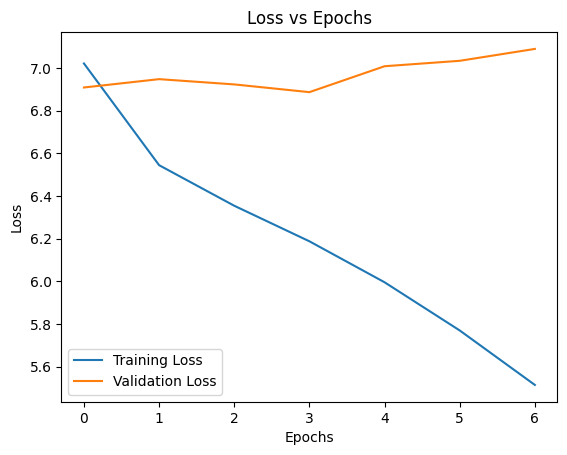

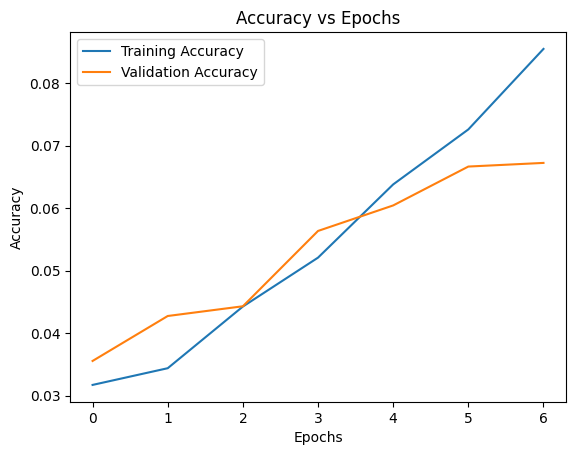

In [19]:
#plot the graph 
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [20]:
# Function to predict the next word
def predict_next_word(model, tokenizer, text, max_sequence_len):
    token_list = tokenizer.texts_to_sequences([text])[0]
    if len(token_list) >= max_sequence_len:
        token_list = token_list[-(max_sequence_len-1):]  # Ensure the sequence length matches max_sequence_len-1
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=1)
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            return word
    return None

In [ ]:
input_text="my name is nikhil and i am a king and my gender is "
print(f"Input text:{input_text}")
max_sequence_len=model.input_shape[1]+1
next_word=predict_next_word(model,tokenizer,input_text,max_sequence_len)
print(f"Next Word PRediction:{next_word}")

Input text:my name is nikhil and i am a king and my gender is 
Next Word PRediction:the


In [22]:
## Save the model
model.save("next_word_lstm.h5")
## Save the tokenizer
import pickle
with open('tokenizer.pickle','wb') as handle:
    pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
input_text="  Barn. Last night of all,When yond same"
print(f"Input text:{input_text}")
max_sequence_len=model.input_shape[1]+1
next_word=predict_next_word(model,tokenizer,input_text,max_sequence_len)
print(f"Next Word PRediction:{next_word}")

Input text:  Barn. Last night of all,When yond same
Next Word PRediction:selfe
